In [17]:
import json
import typing as tp

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from matplotlib.figure import Figure


class YouTube2:
    def __init__( # task0
            self,
            trends_df_path: str="data/RUvideos_short.csv",
            categories_df_path: str="data/RU_category_id.json"
    ):
        self.trends_df = pd.read_csv(trends_df_path)
        self.trends_df.trending_date = pd.to_datetime(self.trends_df.trending_date,
                                                      format='%y.%d.%m', dayfirst=True)
        self.trends_df.trending_date = self.trends_df.trending_date.dt.day

        with open(categories_df_path) as json_file:
            json_data = json.load(json_file)

        self.categories_df = pd.DataFrame(columns=['id', 'name'])

        for item in json_data['items']:
            self.categories_df = self.categories_df.append(
                {'id': int(item['id']),
                 'name': item['snippet']['title']},
                ignore_index=True
            )

        self.categories_df['id'] = self.categories_df['id'].astype(int)

    def task1(self) -> pd.DataFrame:
        self.merged = self.trends_df.merge(self.categories_df, left_on='category_id', right_on='id')
        return self.merged

    def task2(self) -> pd.DataFrame:
        self.pivot_table = pd.pivot_table(self.merged, index='name', columns='trending_date',
                                          values='views', aggfunc=np.sum)
        return self.pivot_table

    def task3(self) -> Figure:
        tmp = self.pivot_table.apply(lambda x: x / 1e6)

        sns.heatmap(tmp, annot=True)
        plt.title('Визуализация сводной таблицы')
        return plt.gcf()

    def task4(self) -> pd.DataFrame:
        self.pivot_table.loc[:, 'Всего просмотров'] = self.pivot_table.sum(axis=1)
        self.pivot_table.loc['Всего просмотров', :] = self.pivot_table.sum(axis=0)
        return self.pivot_table

    def task5(self) -> Figure:
        tmp = self.pivot_table.apply(lambda x: x / 1e6)

        sns.heatmap(tmp, annot=True, vmin=-5, vmax=10)
        plt.title('Визуализация дополненной сводной таблицы')
        plt.xlabel('Дата')
        plt.ylabel('Жанр')
        return plt.gcf()

In [18]:
hosting = YouTube2()
hosting.trends_df.head()

/var/folders/_7/hjygvl4n3bxbd0nh1_ztt_380000gn/T/ipykernel_53161/4086320967.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.categories_df = self.categories_df.append(
/var/folders/_7/hjygvl4n3bxbd0nh1_ztt_380000gn/T/ipykernel_53161/4086320967.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.categories_df = self.categories_df.append(
/var/folders/_7/hjygvl4n3bxbd0nh1_ztt_380000gn/T/ipykernel_53161/4086320967.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.categories_df = self.categories_df.append(
/var/folders/_7/hjygvl4n3bxbd0nh1_ztt_380000gn/T/ipykernel_53161/4086320967.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,gDuslQ9avLc,14,Захар и Полина учатся экономить,Т—Ж БОГАЧ,22,2017-11-13T09:09:31.000Z,"захар и полина|""учимся экономить""|""копить день...",62408,334,190,50,https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg,False,False,False,"Знакомьтесь, это Захар и Полина. Вместе с ними..."
1,AOCJIFEA_jE,14,Биржа Мемов #29. Большой выпуск,Druzhko Show,22,2017-11-13T17:32:11.000Z,"биржа мемов|""лев шагинян""|""мемы""|""пикчи""|""друж...",330043,43841,2244,2977,https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg,False,False,False,"В 29 выпуске Дружко Шоу Сергей сказал, что Бир..."
2,VAWNQDgwwOM,14,ХАЙП КЭМП - СВОЙ СРЕДИ ЧУЖИХ,Юлик,24,2017-11-13T16:11:31.000Z,"юмор|""комедия""|""влог""|""блог""|""смешно""|""смешное...",424596,49854,714,2944,https://i.ytimg.com/vi/VAWNQDgwwOM/default.jpg,False,False,False,http://kapitany.ru/!Yulik.cap - Факультет #Кап...
3,gknkFwKQfHg,14,Сочная кесадилья с курицей,Hochland,22,2017-11-13T06:51:10.000Z,"хохланд|""сыр""|""рецепты""|""как приготовить""|""вку...",112851,3566,122,80,https://i.ytimg.com/vi/gknkFwKQfHg/default.jpg,False,False,False,*** как готовить ресторанные блюда дома
4,3sYvZcwzZr8,14,КЛИПЫ РОДИТЕЛЕЙ НА ШКОЛЬНЫЙ ВЫПУСКНОЙ,Совергон,24,2017-11-13T16:52:36.000Z,"Совергон|""Sovergon""|""клипы""|""родители""|""школа""...",243469,36216,631,1692,https://i.ytimg.com/vi/3sYvZcwzZr8/default.jpg,False,False,False,❏ КОНКУРС КАПИТАНЫ: http://kapitany.ru/!Soverg...


In [19]:
hosting.categories_df.head()

,id,name
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports


In [20]:
merged = hosting.trends_df.merge(hosting.categories_df, left_on='category_id', right_on='id')
merged.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,id,name
0,gDuslQ9avLc,14,Захар и Полина учатся экономить,Т—Ж БОГАЧ,22,2017-11-13T09:09:31.000Z,"захар и полина|""учимся экономить""|""копить день...",62408,334,190,50,https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg,False,False,False,"Знакомьтесь, это Захар и Полина. Вместе с ними...",22,People & Blogs
1,AOCJIFEA_jE,14,Биржа Мемов #29. Большой выпуск,Druzhko Show,22,2017-11-13T17:32:11.000Z,"биржа мемов|""лев шагинян""|""мемы""|""пикчи""|""друж...",330043,43841,2244,2977,https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg,False,False,False,"В 29 выпуске Дружко Шоу Сергей сказал, что Бир...",22,People & Blogs
2,gknkFwKQfHg,14,Сочная кесадилья с курицей,Hochland,22,2017-11-13T06:51:10.000Z,"хохланд|""сыр""|""рецепты""|""как приготовить""|""вку...",112851,3566,122,80,https://i.ytimg.com/vi/gknkFwKQfHg/default.jpg,False,False,False,*** как готовить ресторанные блюда дома,22,People & Blogs
3,TZdNwUSgRHc,14,"РПЦ незаконно строит храм, полиция смотрит как...",Нет застройке без согласия,22,2017-11-13T06:29:09.000Z,[none],97006,2259,330,887,https://i.ytimg.com/vi/TZdNwUSgRHc/default.jpg,False,False,False,"Строители нападают на муниципального депутата,...",22,People & Blogs
4,ss0q7YJ8weU,14,5 антиЛАЙФХАКОВ без которых жизнь невозможна!,DIPT,22,2017-11-13T15:49:05.000Z,"лайфхаки|""дипт""|""dipt""|""антилайфхаки""|""лайфхак...",148974,5434,5247,1612,https://i.ytimg.com/vi/ss0q7YJ8weU/default.jpg,False,False,False,Инвестируй - https://binary-monster.com/ \nВс...,22,People & Blogs


In [21]:
pivot_table = pd.pivot_table(merged, index='name', columns='trending_date',
                             values='views', aggfunc=np.sum)
pivot_table

trending_date,14,15,16,17,18,19,20,21
name,,,,,,,,
Autos & Vehicles,1350890.0,2076443.0,2051608.0,1386676.0,1713087.0,1736740.0,962761.0,1421017.0
Comedy,2310887.0,4152389.0,4156893.0,3556025.0,3806238.0,3556578.0,5648120.0,4627423.0
Education,139723.0,28850.0,6963.0,146943.0,256076.0,310830.0,270585.0,186909.0
Entertainment,5010384.0,5289490.0,3373346.0,12299938.0,7519942.0,5877590.0,8174020.0,4585563.0
Film & Animation,636616.0,931837.0,1160112.0,1820958.0,2725012.0,1075440.0,2574276.0,2532978.0
Gaming,885597.0,1609621.0,1583149.0,557074.0,600307.0,193316.0,851814.0,981217.0
Howto & Style,2191619.0,1562421.0,129763.0,1250164.0,1468139.0,156958.0,1402284.0,350009.0
Music,733907.0,1585619.0,4720464.0,9179397.0,6972429.0,1329904.0,1527219.0,809274.0
News & Politics,1010044.0,1225112.0,1174092.0,1251367.0,1056007.0,1028665.0,657263.0,1214178.0


In [22]:
# tmp = pivot_table.apply(lambda x: x / 1e6)
#
# sns.heatmap(tmp, annot=True)
#
# plt.show()

In [23]:
tmp = pivot_table

In [24]:
tmp.iloc[:, 0].sum()

24741496.0

In [25]:
tmp.loc[:, 'Всего просмотров'] = tmp.sum(axis=1)
tmp.loc['Всего просмотров', :] = tmp.sum(axis=0)
tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, Autos & Vehicles to Всего просмотров
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   14                16 non-null     float64
 1   15                15 non-null     float64
 2   16                16 non-null     float64
 3   17                15 non-null     float64
 4   18                16 non-null     float64
 5   19                15 non-null     float64
 6   20                16 non-null     float64
 7   21                16 non-null     float64
 8   Всего просмотров  16 non-null     float64
dtypes: float64(9)
memory usage: 1.8+ KB


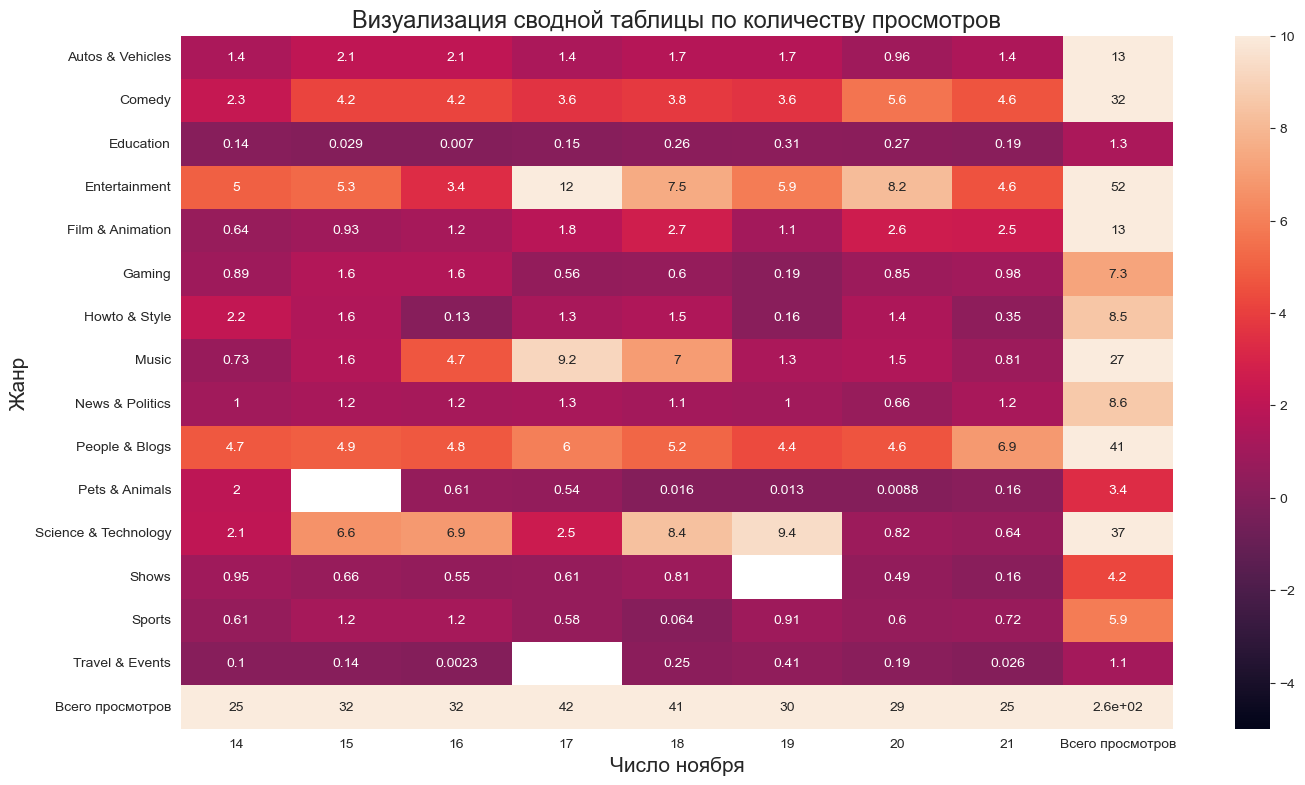

In [26]:
tmp = tmp.apply(lambda x: x / 1e6)

plt.figure(figsize=(16, 9))

sns.heatmap(tmp, annot=True, vmin=-5, vmax=10)
plt.title('Визуализация сводной таблицы по количеству просмотров', fontdict={'fontsize': 17})
plt.xlabel('Число ноября', fontdict={'fontsize': 15})
plt.ylabel('Жанр', fontdict={'fontsize': 15})


plt.show()

In [27]:
data = YouTube2()

/var/folders/_7/hjygvl4n3bxbd0nh1_ztt_380000gn/T/ipykernel_53161/4086320967.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.categories_df = self.categories_df.append(
/var/folders/_7/hjygvl4n3bxbd0nh1_ztt_380000gn/T/ipykernel_53161/4086320967.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.categories_df = self.categories_df.append(
/var/folders/_7/hjygvl4n3bxbd0nh1_ztt_380000gn/T/ipykernel_53161/4086320967.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.categories_df = self.categories_df.append(
/var/folders/_7/hjygvl4n3bxbd0nh1_ztt_380000gn/T/ipykernel_53161/4086320967.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

In [28]:
data.task1()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,id,name
0,gDuslQ9avLc,14,Захар и Полина учатся экономить,Т—Ж БОГАЧ,22,2017-11-13T09:09:31.000Z,"захар и полина|""учимся экономить""|""копить день...",62408,334,190,50,https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg,False,False,False,"Знакомьтесь, это Захар и Полина. Вместе с ними...",22,People & Blogs
1,AOCJIFEA_jE,14,Биржа Мемов #29. Большой выпуск,Druzhko Show,22,2017-11-13T17:32:11.000Z,"биржа мемов|""лев шагинян""|""мемы""|""пикчи""|""друж...",330043,43841,2244,2977,https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg,False,False,False,"В 29 выпуске Дружко Шоу Сергей сказал, что Бир...",22,People & Blogs
2,gknkFwKQfHg,14,Сочная кесадилья с курицей,Hochland,22,2017-11-13T06:51:10.000Z,"хохланд|""сыр""|""рецепты""|""как приготовить""|""вку...",112851,3566,122,80,https://i.ytimg.com/vi/gknkFwKQfHg/default.jpg,False,False,False,*** как готовить ресторанные блюда дома,22,People & Blogs
3,TZdNwUSgRHc,14,"РПЦ незаконно строит храм, полиция смотрит как...",Нет застройке без согласия,22,2017-11-13T06:29:09.000Z,[none],97006,2259,330,887,https://i.ytimg.com/vi/TZdNwUSgRHc/default.jpg,False,False,False,"Строители нападают на муниципального депутата,...",22,People & Blogs
4,ss0q7YJ8weU,14,5 антиЛАЙФХАКОВ без которых жизнь невозможна!,DIPT,22,2017-11-13T15:49:05.000Z,"лайфхаки|""дипт""|""dipt""|""антилайфхаки""|""лайфхак...",148974,5434,5247,1612,https://i.ytimg.com/vi/ss0q7YJ8weU/default.jpg,False,False,False,Инвестируй - https://binary-monster.com/ \nВс...,22,People & Blogs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,SFsnUioBIDM,19,Бездомные коты и достопримечательности Рима! О...,Орел и Решка,19,2017-11-18T13:58:24.000Z,"орел и решка перезагрузка|""орел и решка рим""|""...",9211,325,14,31,https://i.ytimg.com/vi/SFsnUioBIDM/default.jpg,False,False,False,Когда Орёл и Решка посетили столицу Италии - г...,19,Travel & Events
1517,jLZ-MRskz_I,20,Таиланд Симиланы. Дайвинг. Улица Красных Фонарей,Alexander Kondrashov,19,2017-11-19T16:22:49.000Z,"александр кондрашов|""путешествия""|""влоги""|""пут...",135817,5714,331,781,https://i.ytimg.com/vi/jLZ-MRskz_I/default.jpg,False,False,False,Инстаграм - instagram.com/phuketcheaptour\nКан...,19,Travel & Events
1518,wMN1UiqAaOY,20,Мадрид. Орёл и Решка. Перезагрузка. RUS,Орел и Решка,19,2017-11-19T09:28:52.000Z,"орел и решка перезагрузка|""орел и решка мадрид...",44074,883,36,152,https://i.ytimg.com/vi/wMN1UiqAaOY/default.jpg,False,False,False,Орёл и Решка. Перезагрузка в столице Испании -...,19,Travel & Events
1519,dqGPBMVgVMQ,20,🔴 АШАН. КРЫМ. Что на полках в Ашане? Цены в Кр...,КРЫМ ГЛАЗАМИ МЕСТНЫХ,19,2017-11-19T06:05:58.000Z,"ашан|""крым""|""Крым""|""Крым 2017""|""Крым сегодня""|...",6985,306,16,317,https://i.ytimg.com/vi/dqGPBMVgVMQ/default.jpg,False,False,False,"Всем привет! Сегодня в видео гипермаркет АШАН,...",19,Travel & Events


In [29]:
data.task2()

trending_date,14,15,16,17,18,19,20,21
name,,,,,,,,
Autos & Vehicles,1350890.0,2076443.0,2051608.0,1386676.0,1713087.0,1736740.0,962761.0,1421017.0
Comedy,2310887.0,4152389.0,4156893.0,3556025.0,3806238.0,3556578.0,5648120.0,4627423.0
Education,139723.0,28850.0,6963.0,146943.0,256076.0,310830.0,270585.0,186909.0
Entertainment,5010384.0,5289490.0,3373346.0,12299938.0,7519942.0,5877590.0,8174020.0,4585563.0
Film & Animation,636616.0,931837.0,1160112.0,1820958.0,2725012.0,1075440.0,2574276.0,2532978.0
Gaming,885597.0,1609621.0,1583149.0,557074.0,600307.0,193316.0,851814.0,981217.0
Howto & Style,2191619.0,1562421.0,129763.0,1250164.0,1468139.0,156958.0,1402284.0,350009.0
Music,733907.0,1585619.0,4720464.0,9179397.0,6972429.0,1329904.0,1527219.0,809274.0
News & Politics,1010044.0,1225112.0,1174092.0,1251367.0,1056007.0,1028665.0,657263.0,1214178.0


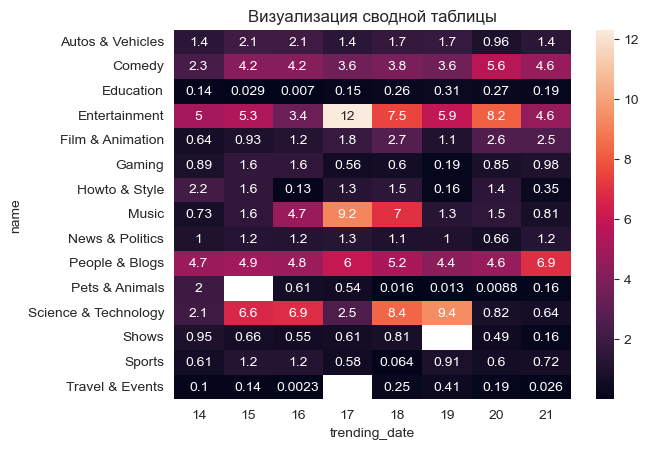

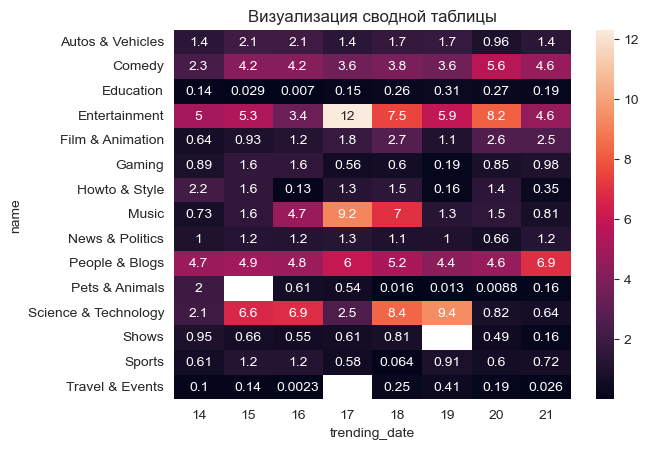

In [30]:
data.task3()

In [31]:
data.task4()

trending_date,14,15,16,17,18,19,20,21,Всего просмотров
name,,,,,,,,,
Autos & Vehicles,1350890.0,2076443.0,2051608.0,1386676.0,1713087.0,1736740.0,962761.0,1421017.0,12699222.0
Comedy,2310887.0,4152389.0,4156893.0,3556025.0,3806238.0,3556578.0,5648120.0,4627423.0,31814553.0
Education,139723.0,28850.0,6963.0,146943.0,256076.0,310830.0,270585.0,186909.0,1346879.0
Entertainment,5010384.0,5289490.0,3373346.0,12299938.0,7519942.0,5877590.0,8174020.0,4585563.0,52130273.0
Film & Animation,636616.0,931837.0,1160112.0,1820958.0,2725012.0,1075440.0,2574276.0,2532978.0,13457229.0
Gaming,885597.0,1609621.0,1583149.0,557074.0,600307.0,193316.0,851814.0,981217.0,7262095.0
Howto & Style,2191619.0,1562421.0,129763.0,1250164.0,1468139.0,156958.0,1402284.0,350009.0,8511357.0
Music,733907.0,1585619.0,4720464.0,9179397.0,6972429.0,1329904.0,1527219.0,809274.0,26858213.0
News & Politics,1010044.0,1225112.0,1174092.0,1251367.0,1056007.0,1028665.0,657263.0,1214178.0,8616728.0


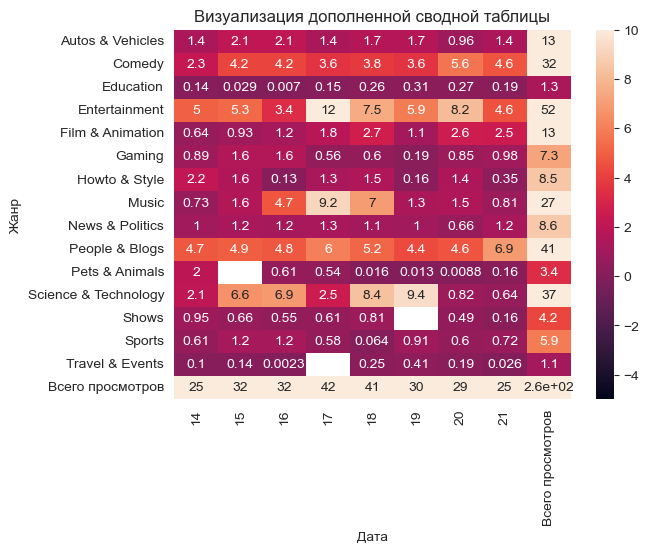

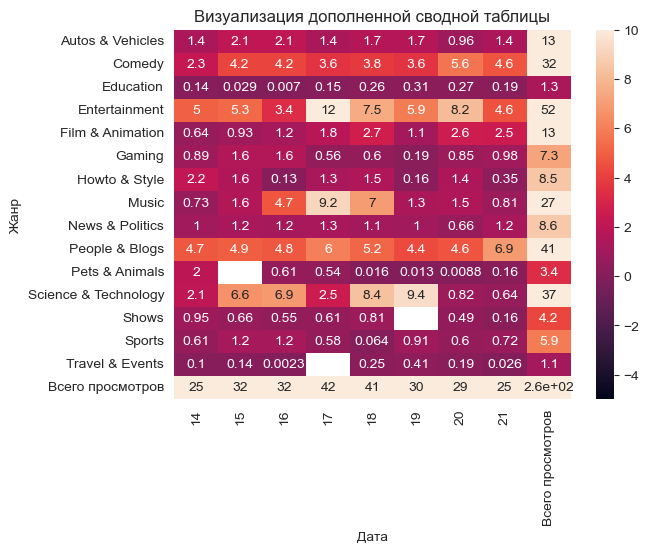

In [32]:
data.task5()

In [ ]:
data